In [1]:
# standard library
import sys

# pydata stack
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import svm

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

%matplotlib inline

In [2]:
print(f'Python version: {sys.version}')
print(f'pandas version: {pd.__version__}')
print(f'seaborn version: {sns.__version__}')
print(f'scikit-learn: {sklearn.__version__}')

Python version: 3.6.1 (default, Apr  4 2017, 09:40:51) 
[GCC 4.2.1 Compatible Apple LLVM 8.0.0 (clang-800.0.42.1)]
pandas version: 0.20.2
seaborn version: 0.7.1
scikit-learn: 0.18.2


---

## Load Dataset

In [3]:
iris = pd.read_csv('data/iris.csv')

---

## Explore with Pandas

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [6]:
iris['species'] = iris['species'].astype('category')

In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null category
dtypes: category(1), float64(4)
memory usage: 5.0 KB


In [8]:
values = ['count', 'min', 'max', 'mean', 'std']
iris.groupby(by='species').agg(values)

sepal_length                            sepal_width            \
                  count  min  max   mean       std       count  min  max   
species                                                                    
setosa               50  4.3  5.8  5.006  0.352490          50  2.3  4.4   
versicolor           50  4.9  7.0  5.936  0.516171          50  2.0  3.4   
virginica            50  4.9  7.9  6.588  0.635880          50  2.2  3.8   

                            petal_length                             \
             mean       std        count  min  max   mean       std   
species                                                               
setosa      3.418  0.381024           50  1.0  1.9  1.464  0.173511   
versicolor  2.770  0.313798           50  3.0  5.1  4.260  0.469911   
virginica   2.974  0.322497           50  4.5  6.9  5.552  0.551895   

           petal_width                             
                 count  min  max   mean       std  
species                                            
setosa              50  0.1  0.6  0.244  0.107210  
versicolor          50  1.0  1.8  1.326  0.197753  
virginica           50  1.4  2.5  2.026  0.274650

---

## Visualization

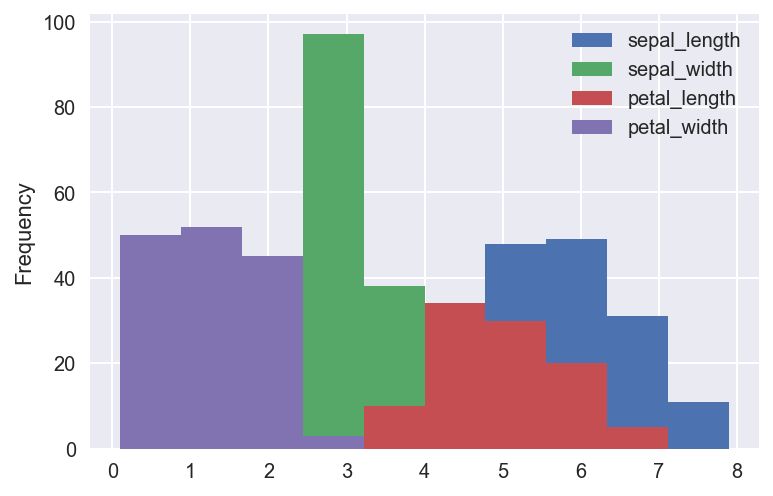

In [9]:
iris.plot.hist()

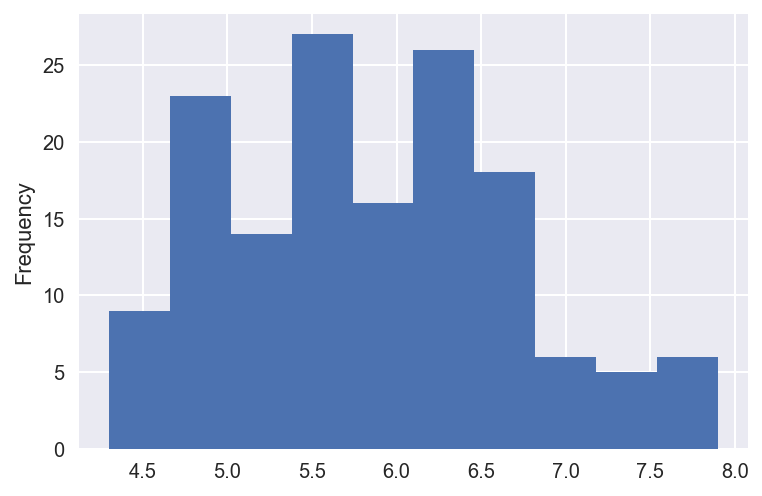

In [10]:
iris['sepal_length'].plot.hist(by='species')

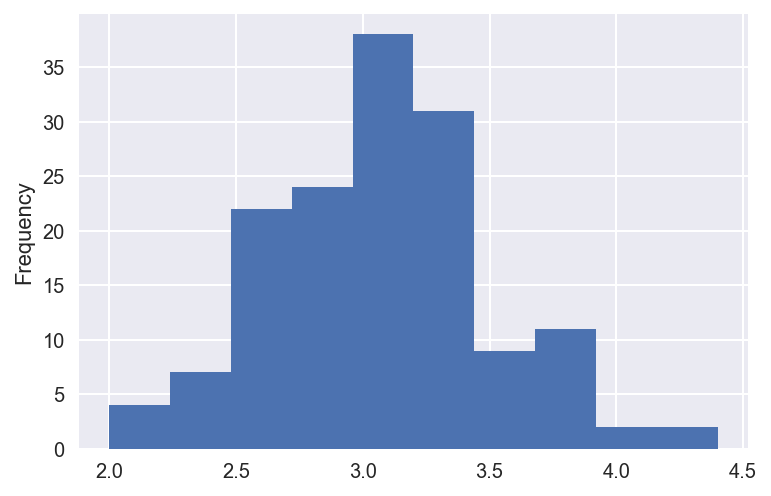

In [11]:
iris['sepal_width'].plot.hist()

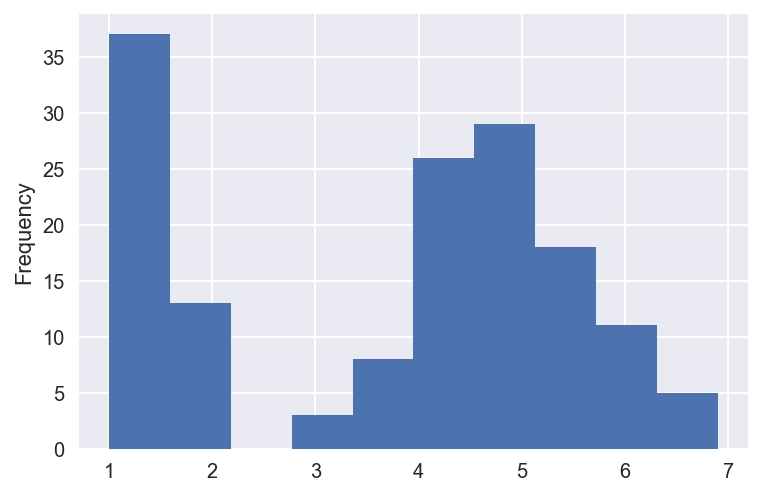

In [12]:
iris['petal_length'].plot.hist()

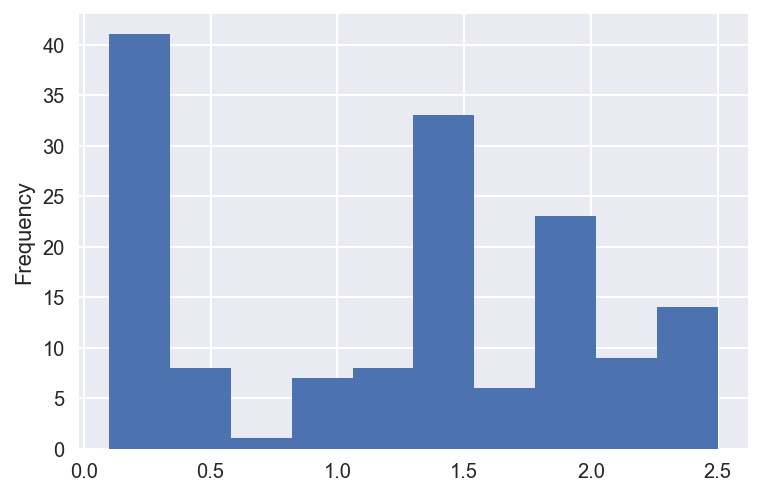

In [13]:
iris['petal_width'].plot.hist()

---

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1126e6c18>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x112a27160>]], dtype=object)

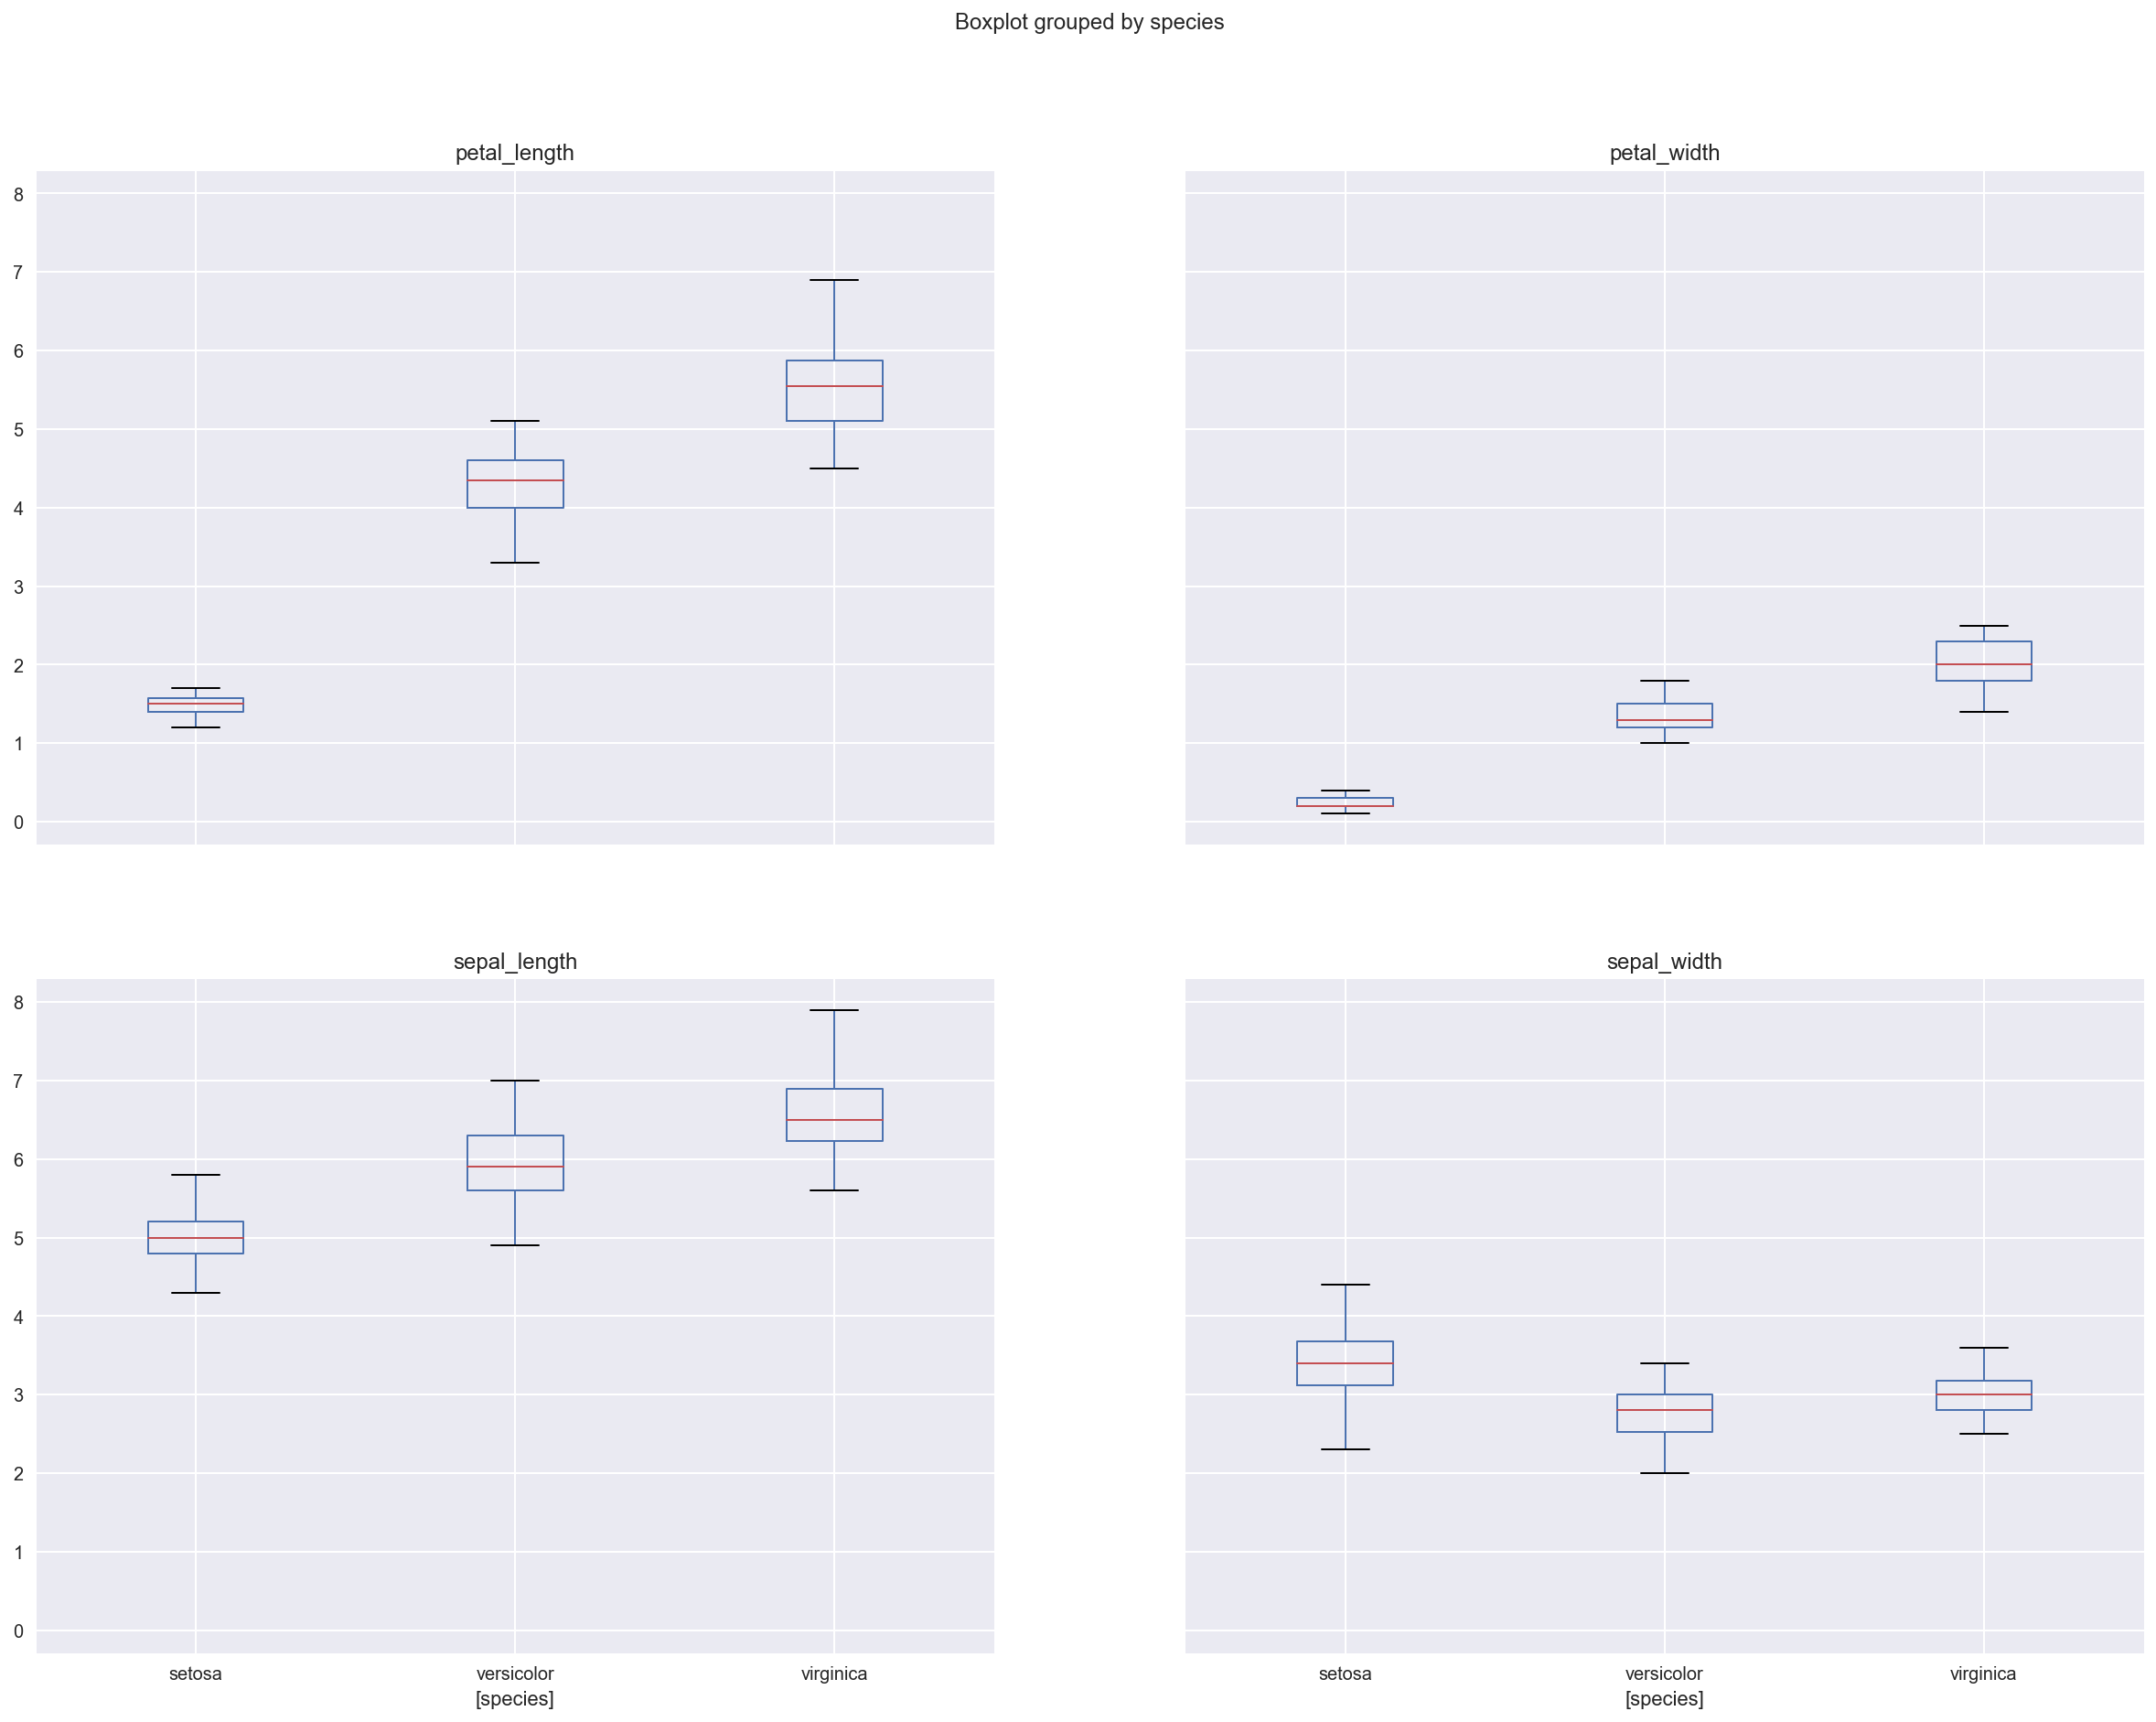

In [14]:
iris.boxplot(by='species', figsize=(20, 15))

---

## Multidimensional Plots

In [15]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1144b4cc0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x115bf5390>]], dtype=object)

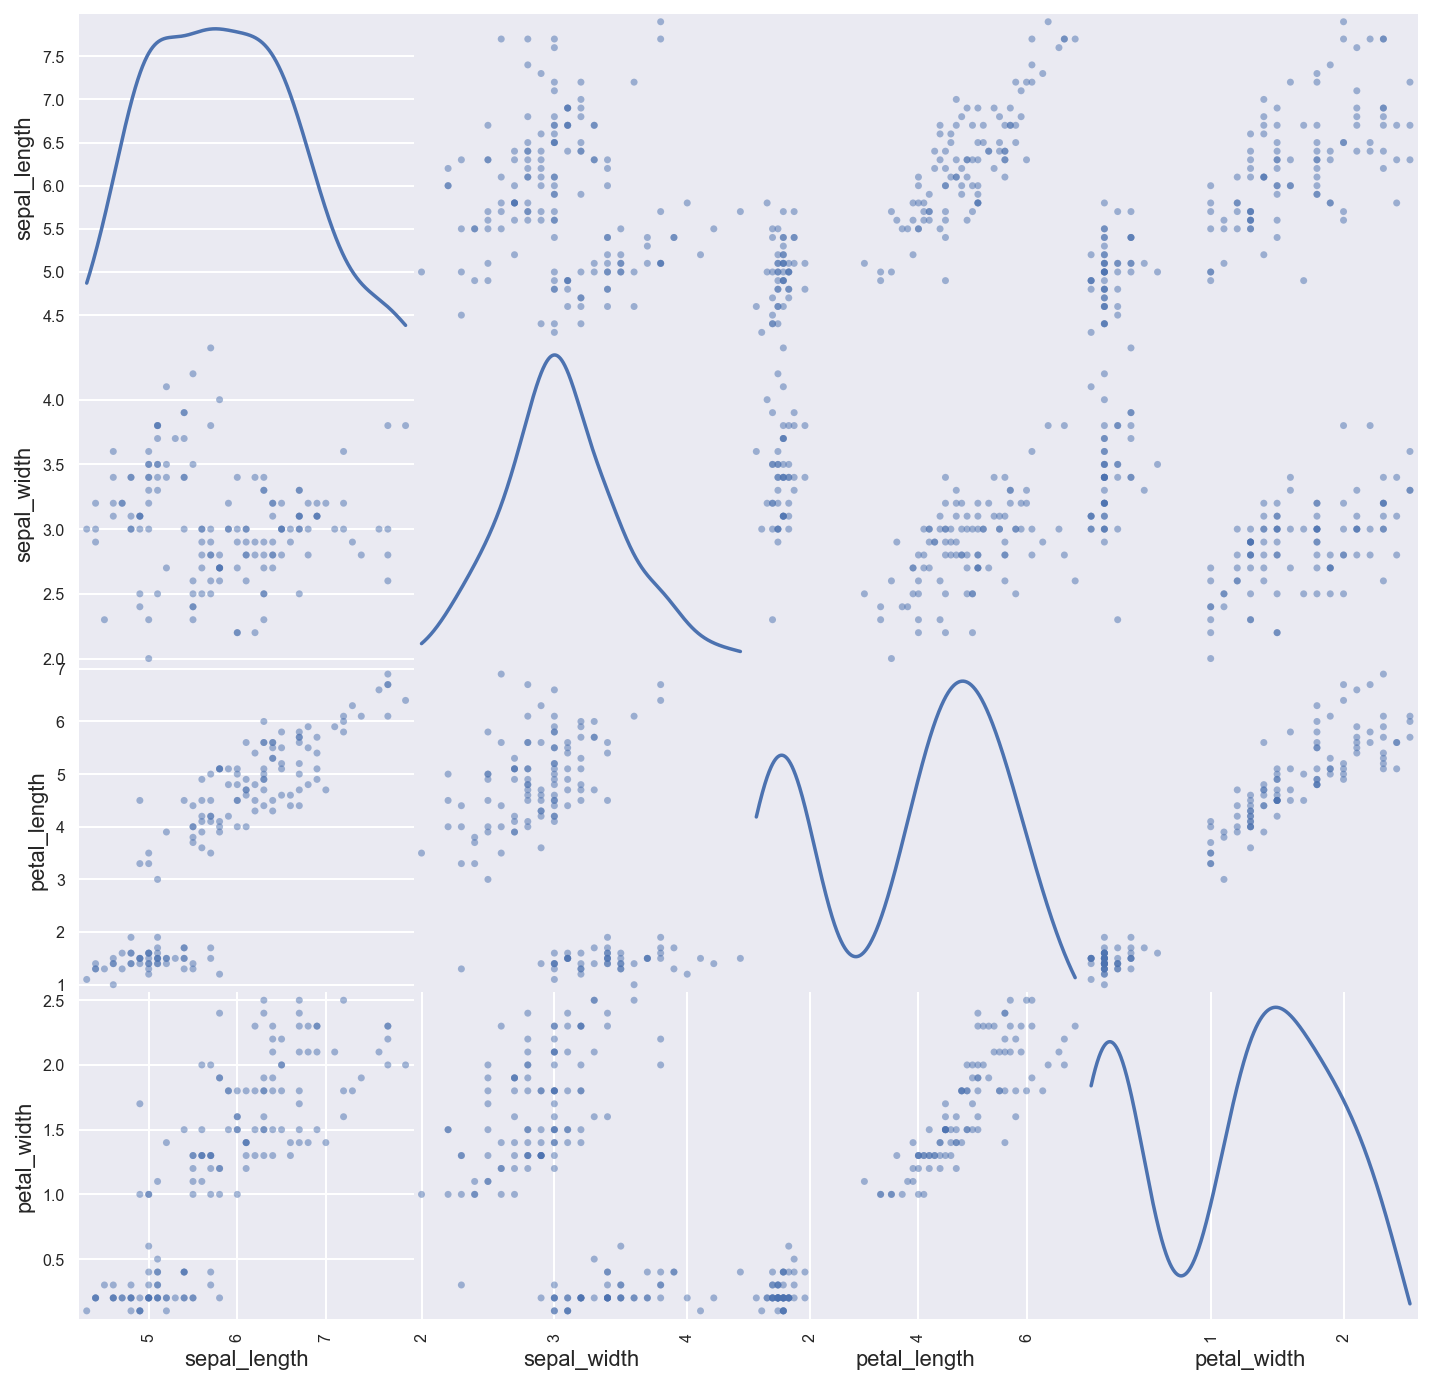

In [16]:
scatter_matrix(iris, figsize=(12, 12), diagonal='kde')

In [17]:
from pandas.plotting import andrews_curves

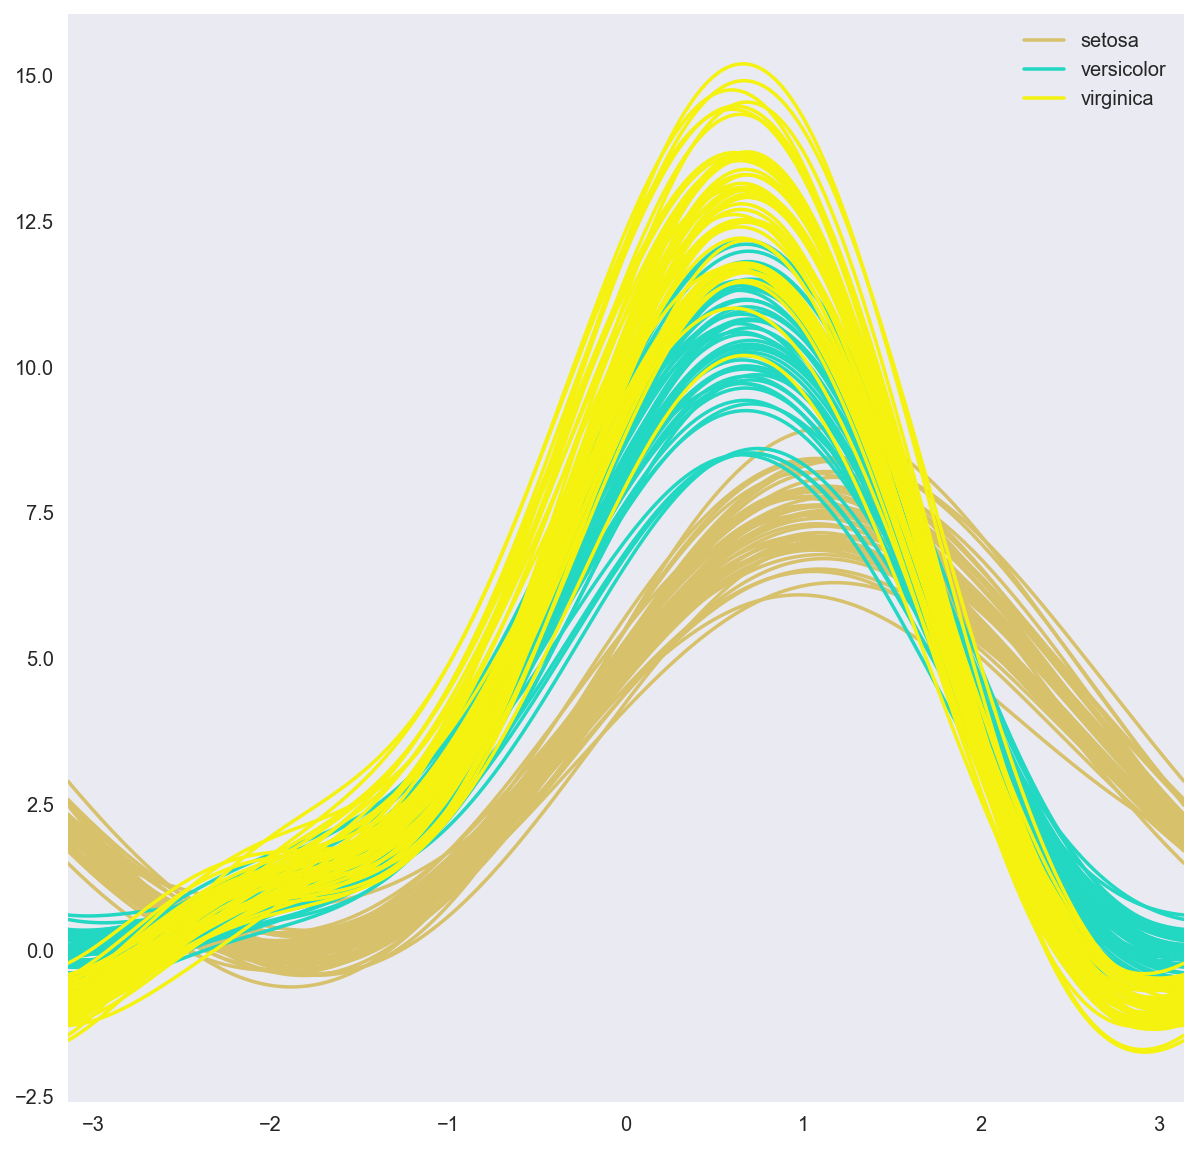

In [18]:
plt.figure(figsize=(10, 10))
andrews_curves(iris, 'species')

In [19]:
from pandas.plotting import parallel_coordinates

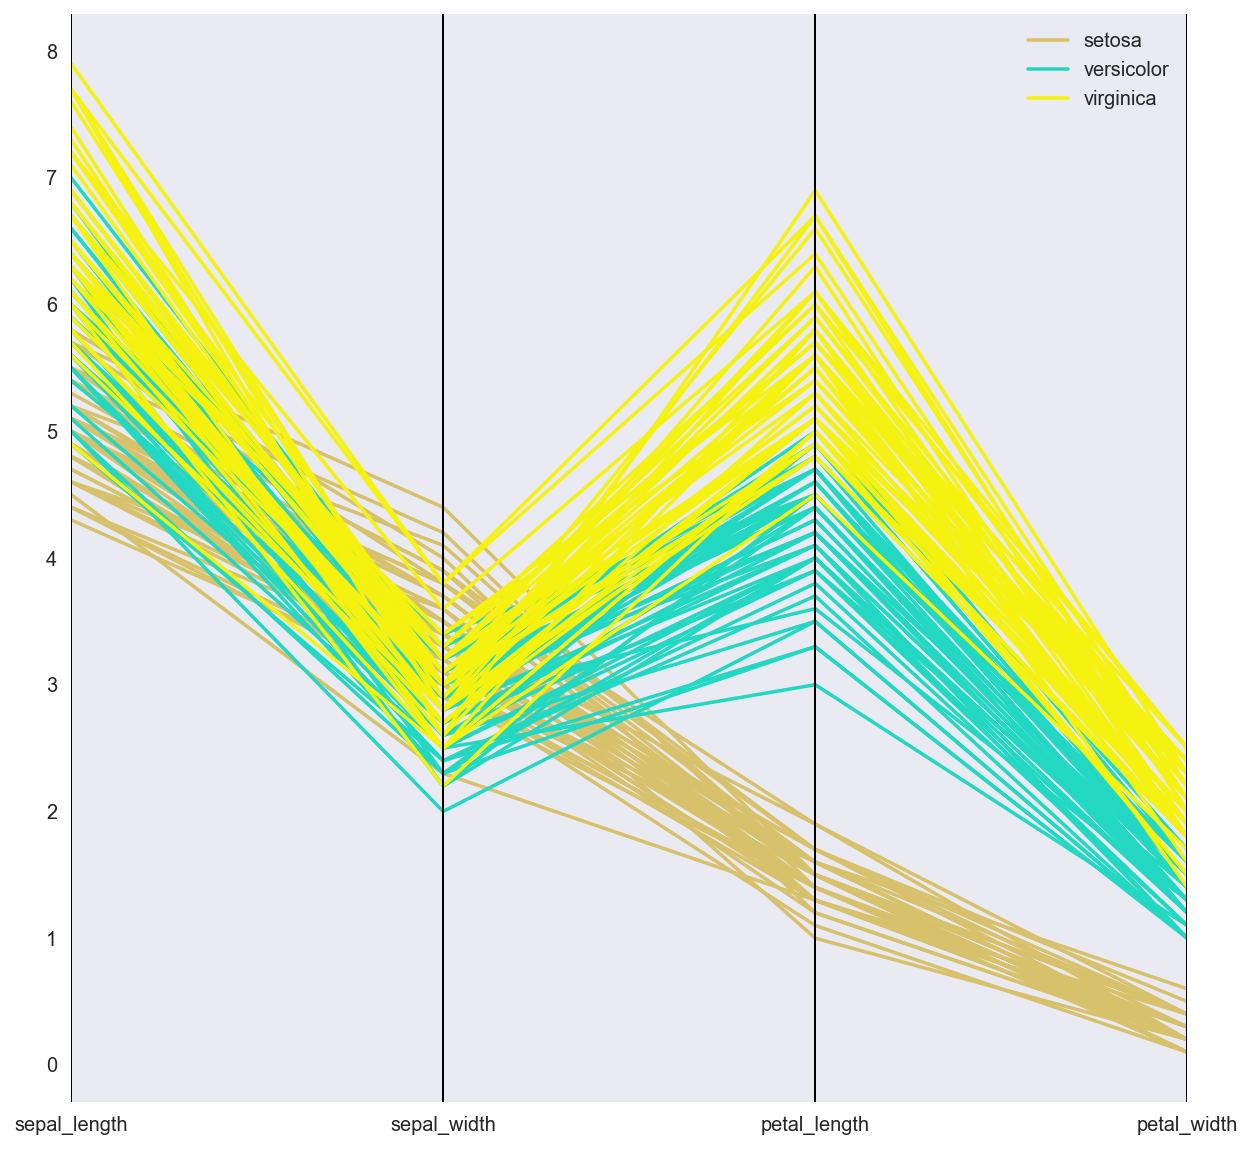

In [20]:
plt.figure(figsize=(10, 10))
parallel_coordinates(iris, 'species')

In [21]:
from pandas.plotting import radviz

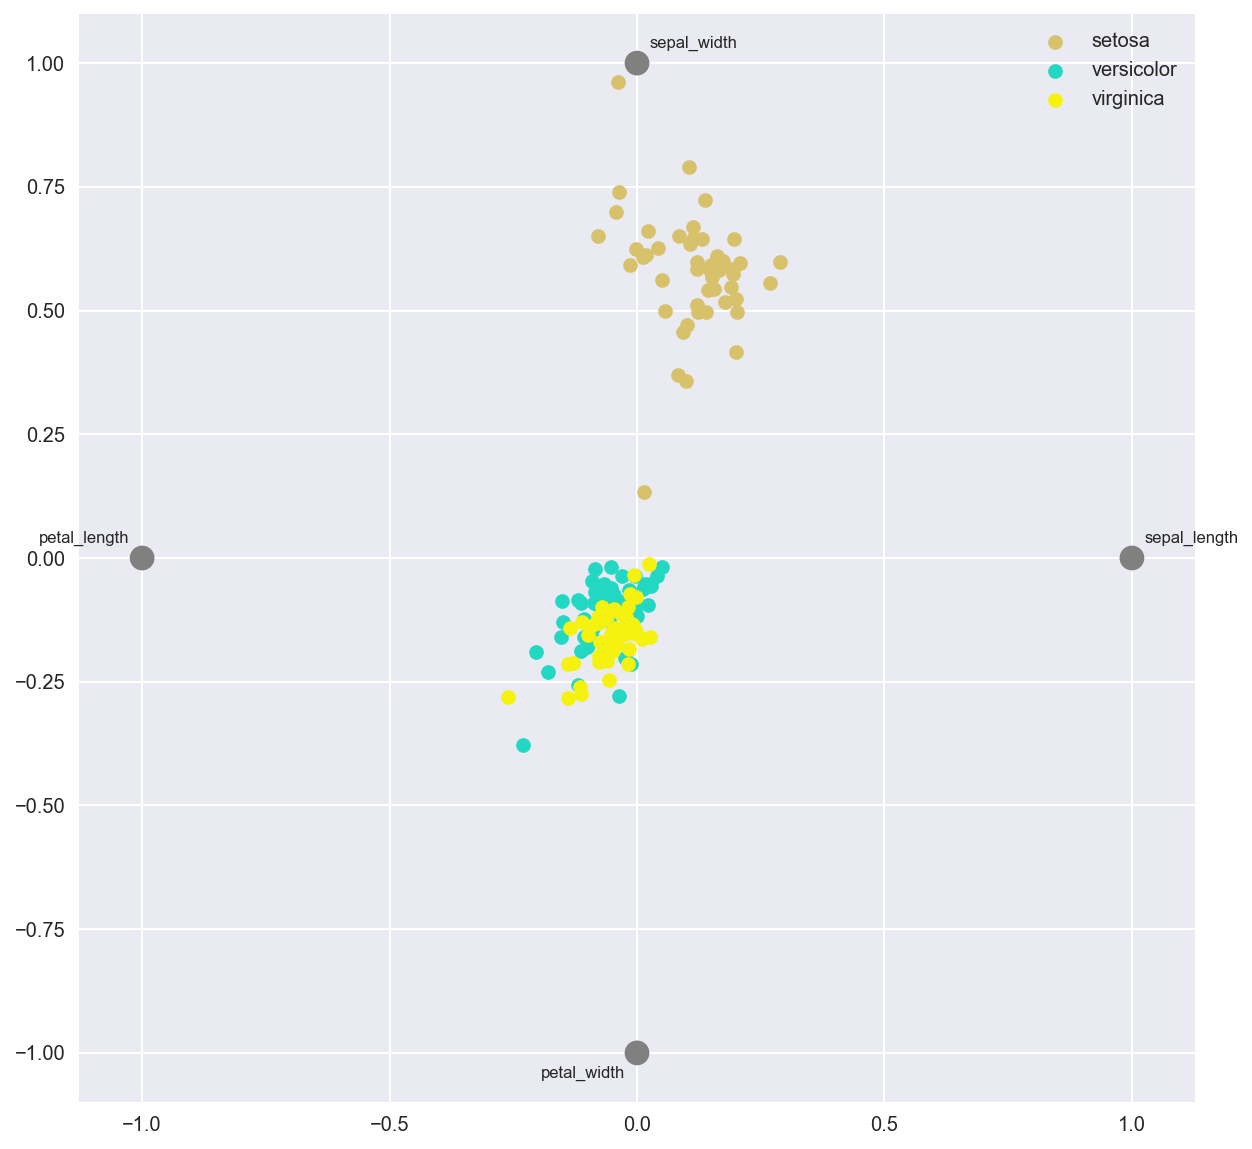

In [22]:
plt.figure(figsize=(10, 10))
radviz(iris, 'species')

---

## Seaborn Visualization

In [23]:
sns.set(color_codes=True)

### Distributions

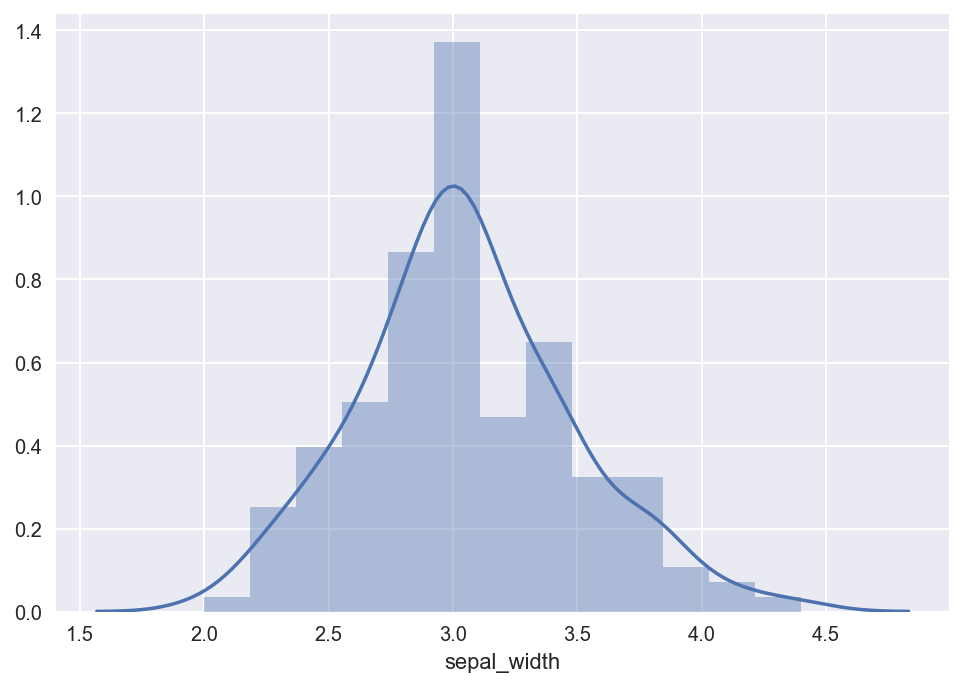

In [24]:
sns.distplot(iris['sepal_width'])

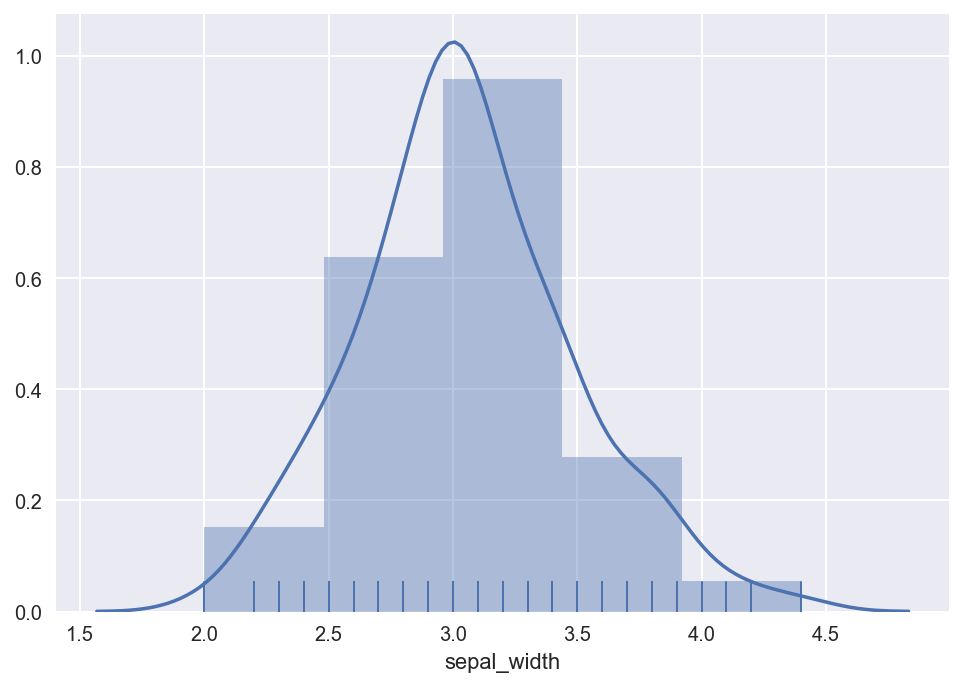

In [25]:
sns.distplot(iris['sepal_width'],
             hist=True,
             kde=True,
             rug=True,
             bins=5)

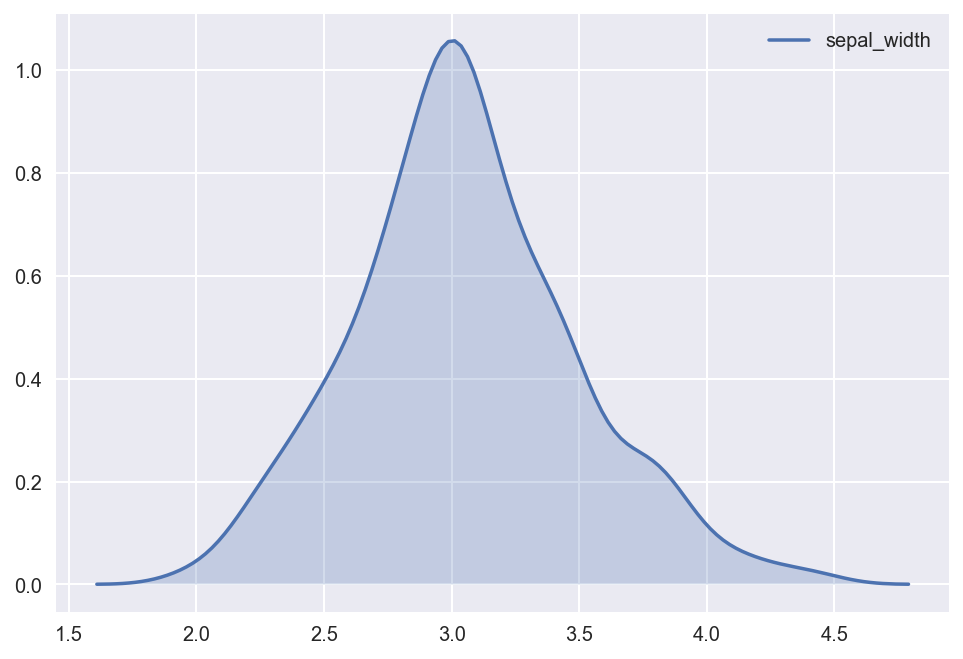

In [26]:
# Kernel Density Estimate... can specify the kind f kernel
sns.kdeplot(iris['sepal_width'],
            shade=True,
            kernel='gau',
            bw=.13)

In [27]:
from scipy import stats

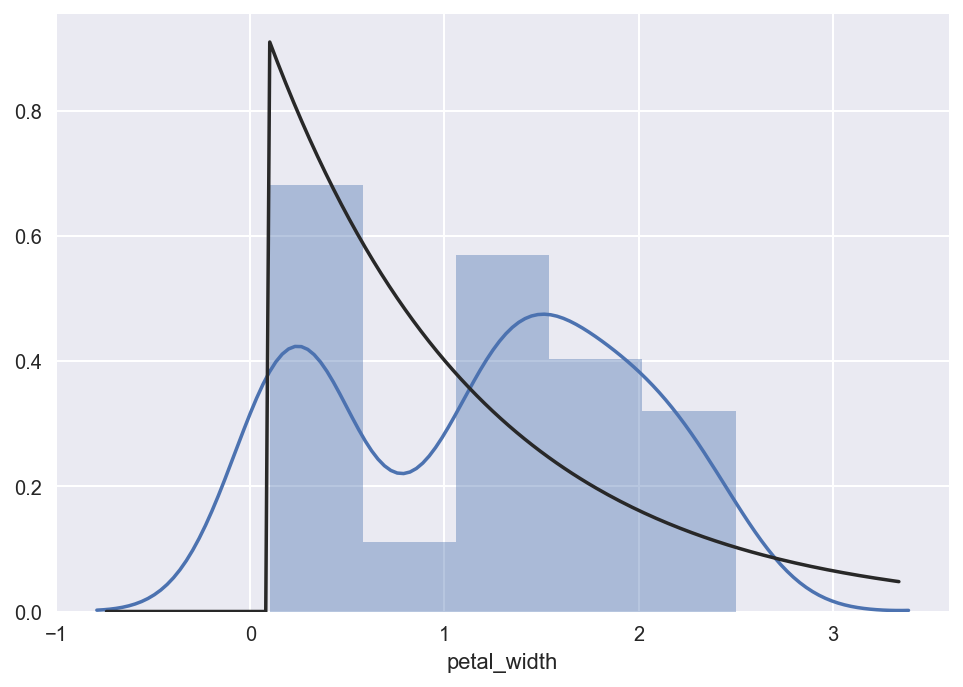

In [28]:
sns.distplot(iris['petal_width'],
             hist=True,
             kde=True,
             fit=stats.expon) ## pass in random variable object

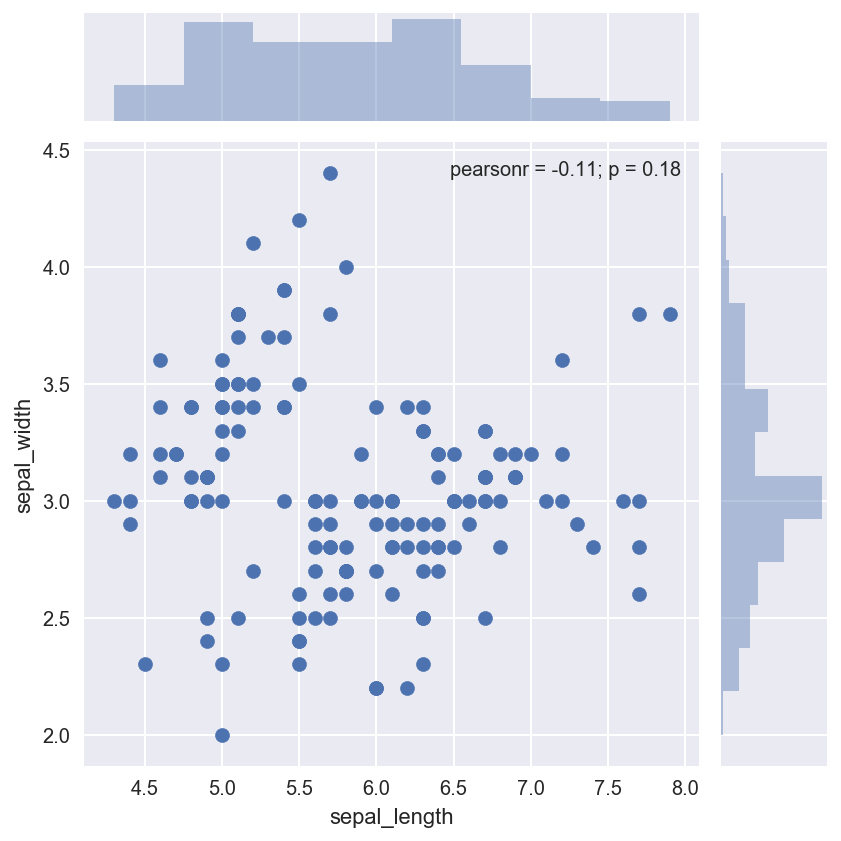

In [29]:
# Jointplot (bivariate distributions)
sns.jointplot(data=iris,
              x='sepal_length',
              y='sepal_width',
              kind='scatter')

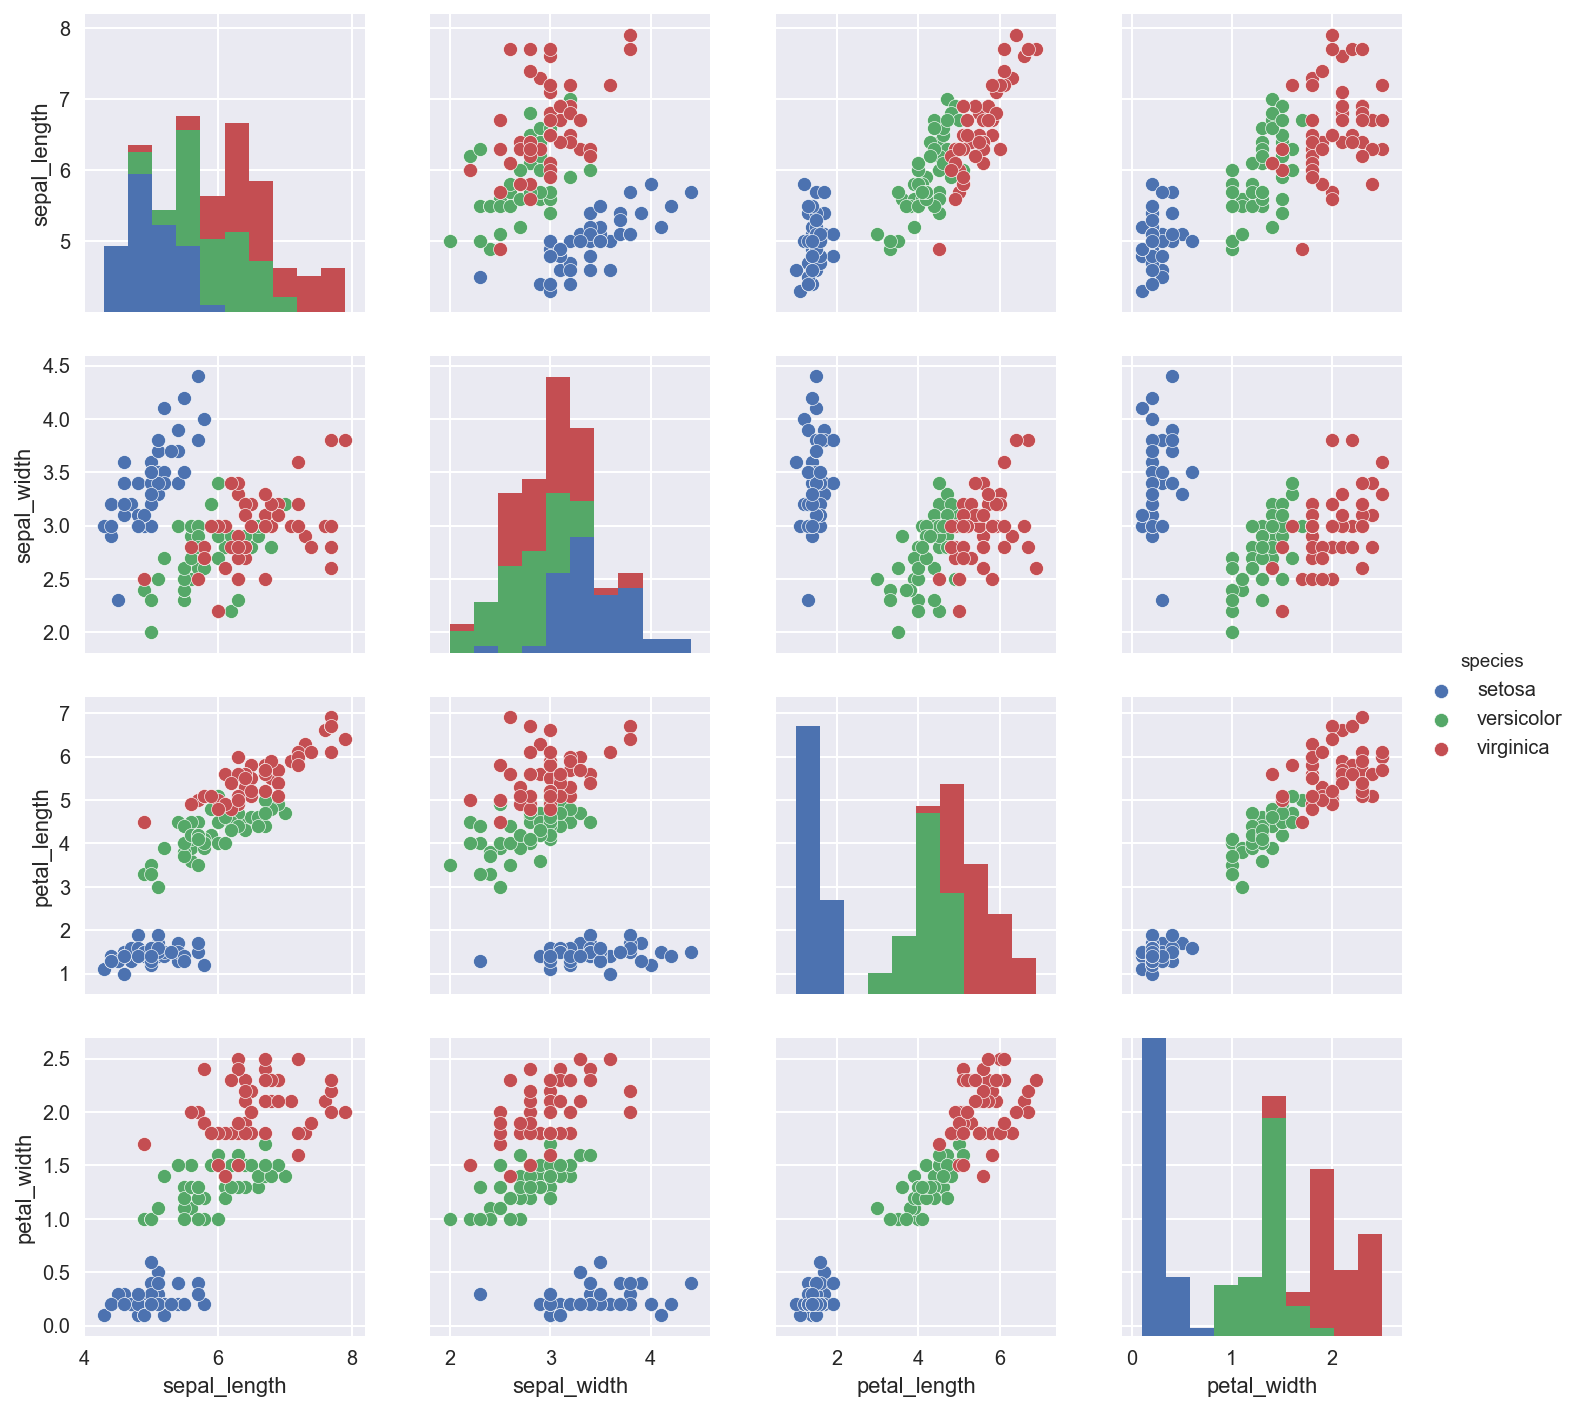

In [30]:
# pairwise relationship
sns.pairplot(iris,
             hue='species')

/Users/alysivji/.virtualenvs/datasci_361/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


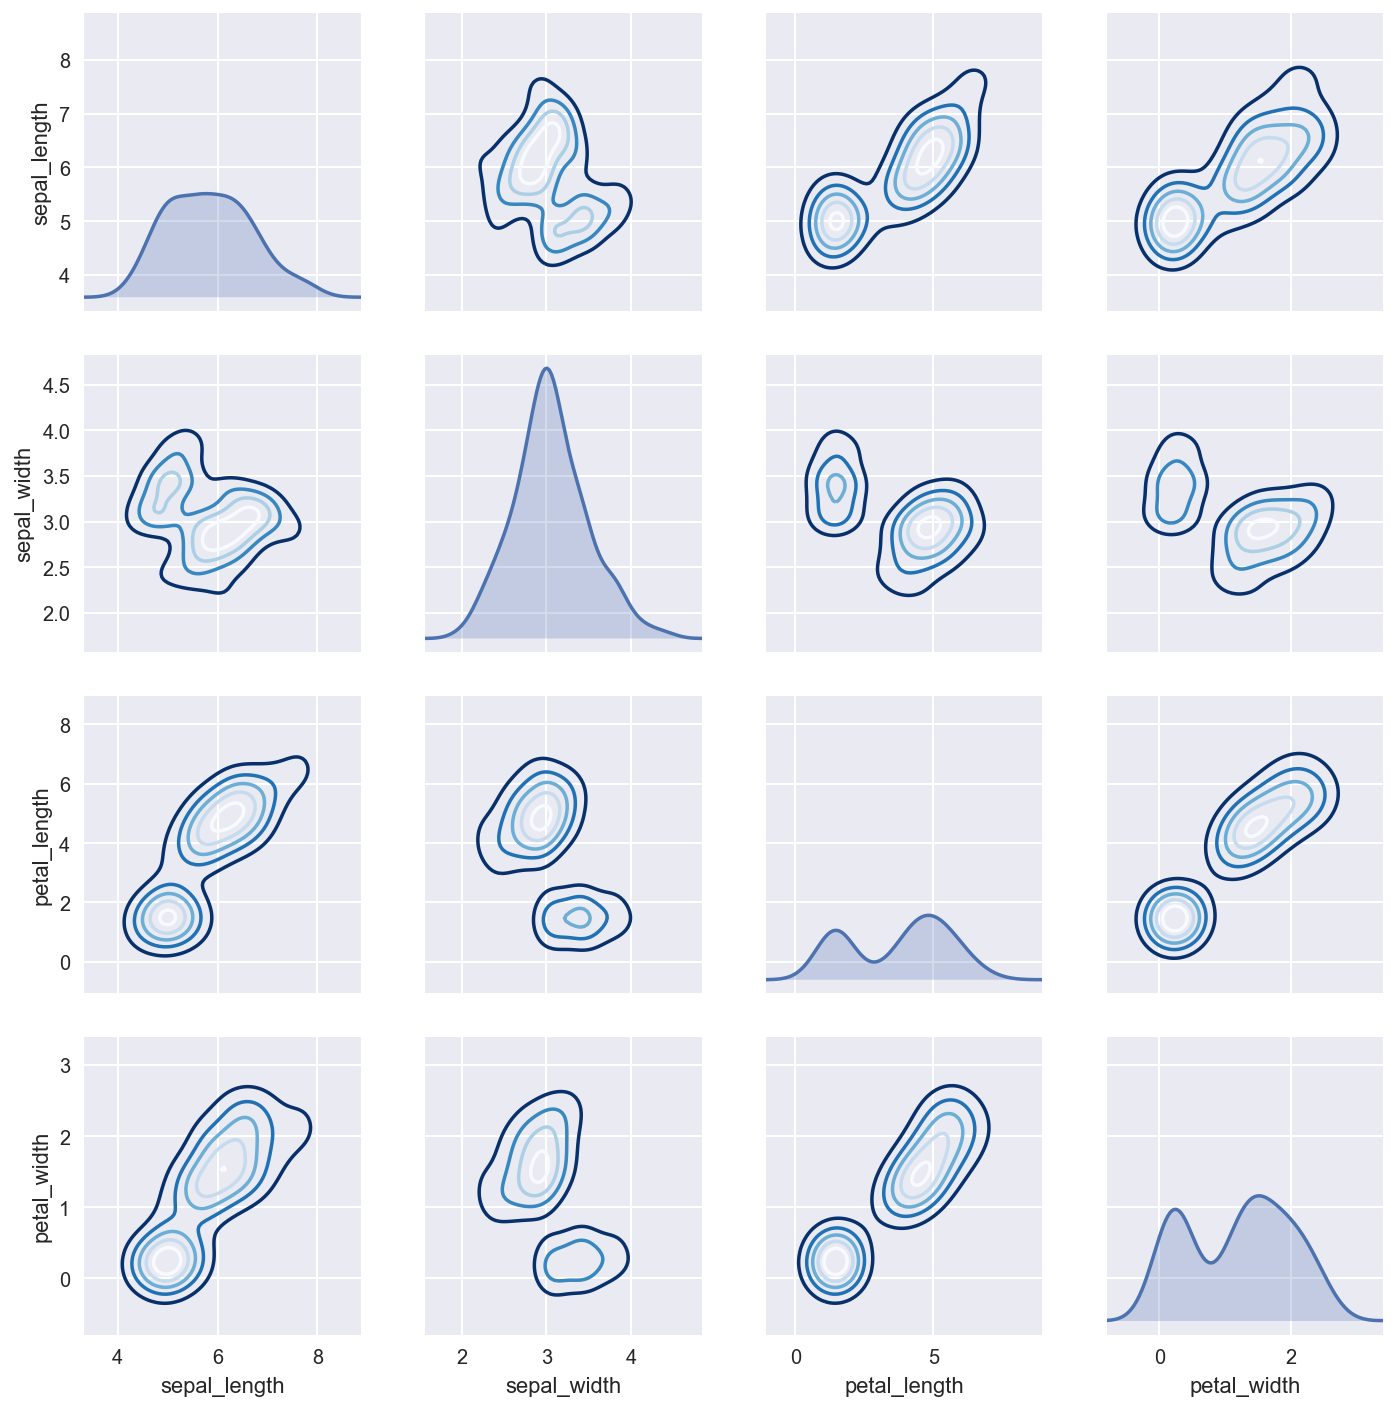

In [31]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot, shade=True)
g.map_offdiag(sns.kdeplot, cmap="Blues_r", n_levels=5)

### Categorical Data

In [32]:
iris['above_sepal_width_mean'] = iris['sepal_width'] > iris['sepal_width'].mean()

#### Scatterplot

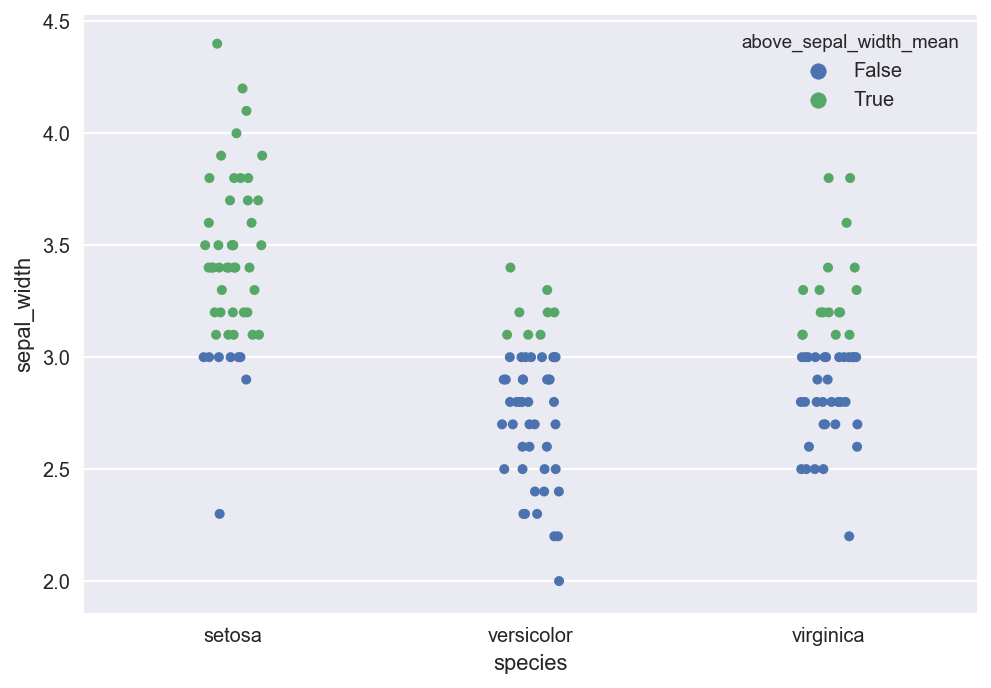

In [33]:
sns.stripplot(data=iris,
              x='species',
              y='sepal_width',
              hue='above_sepal_width_mean',
              jitter=True)

#### Distributions

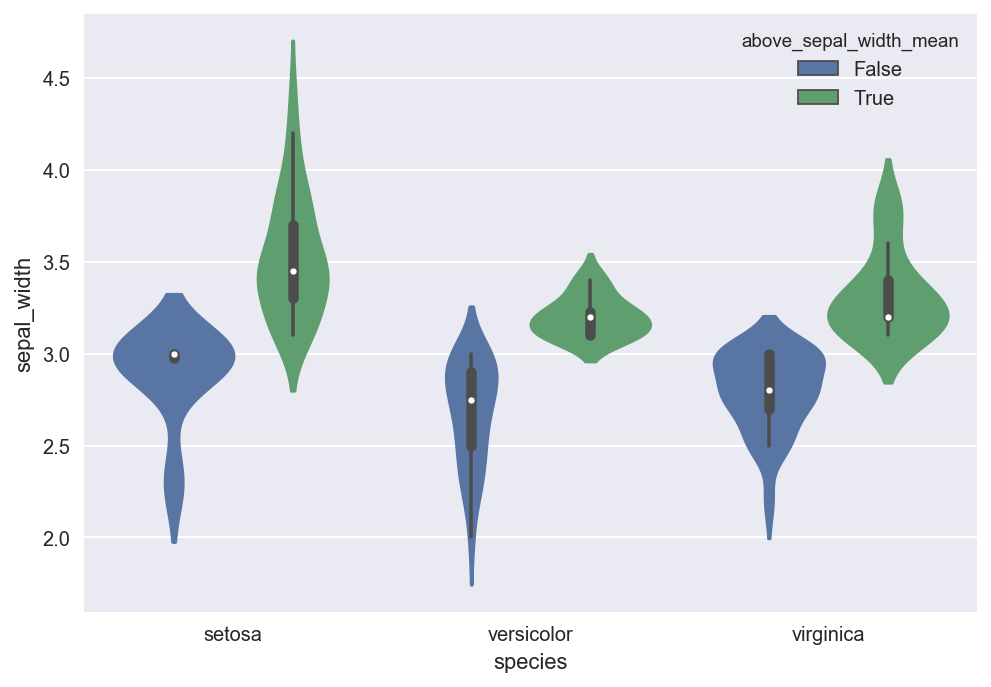

In [34]:
sns.violinplot(data=iris,
               x='species',
               y='sepal_width',
               hue='above_sepal_width_mean',
               inner='box')

---

## Build and plot Support Vector Machine classifers

Adapted from [sklearn docs](http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html)

In [35]:
# convert to sklearn format, grab first 2 columns
X = np.array(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])[:, :2]

# convert strings to categorical
le = sklearn.preprocessing.LabelEncoder()
le.fit(iris['species'])
y = le.transform(iris['species'])

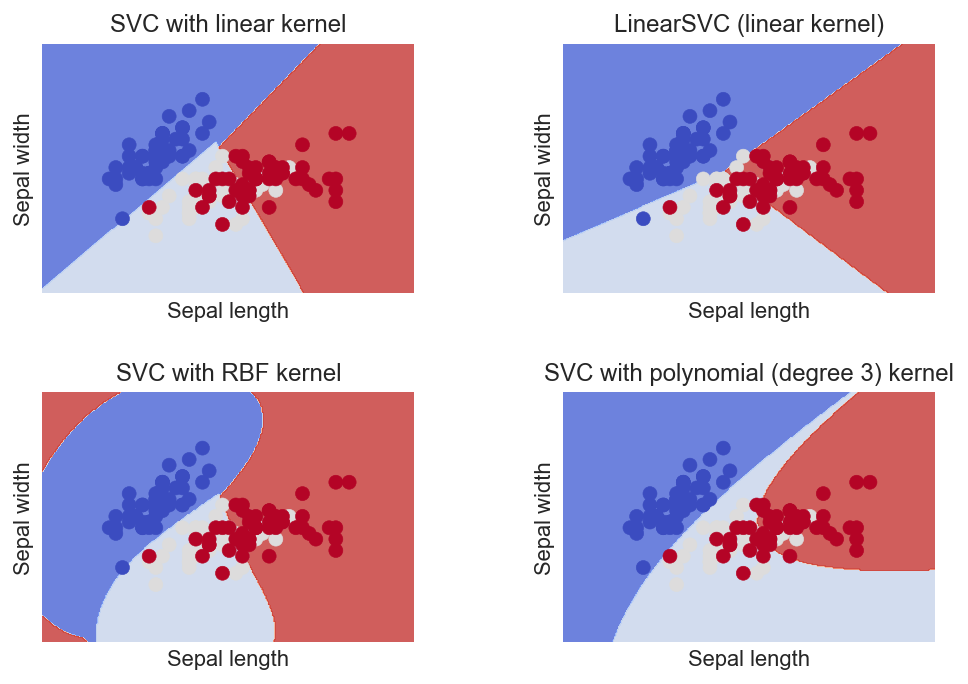

In [36]:
h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = sklearn.svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = sklearn.svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = sklearn.svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = sklearn.svm.LinearSVC(C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()